In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
customers_file = '/content/Customers.csv'
products_file = '/content/Products.csv'
transactions_file = '/content/Transactions.csv'

In [12]:
customers = pd.read_csv(customers_file)
products = pd.read_csv(products_file)
transactions = pd.read_csv(transactions_file)

In [13]:
customers_info = {
    "head": customers.head(),
    "info": customers.info(),
    "summary": customers.describe(include="all")
}

products_info = {
    "head": products.head(),
    "info": products.info(),
    "summary": products.describe(include="all")
}

transactions_info = {
    "head": transactions.head(),
    "info": transactions.info(),
    "summary": transactions.describe(include="all")
}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [14]:
customers_info, products_info, transactions_info

({'head':   CustomerID        CustomerName         Region  SignupDate
  0      C0001    Lawrence Carroll  South America  2022-07-10
  1      C0002      Elizabeth Lutz           Asia  2022-02-13
  2      C0003      Michael Rivera  South America  2024-03-07
  3      C0004  Kathleen Rodriguez  South America  2022-10-09
  4      C0005         Laura Weber           Asia  2022-08-15,
  'info': None,
  'summary':        CustomerID      CustomerName         Region  SignupDate
  count         200               200            200         200
  unique        200               200              4         179
  top         C0001  Lawrence Carroll  South America  2024-11-11
  freq            1                 1             59           3},
 {'head':   ProductID              ProductName     Category   Price
  0      P001     ActiveWear Biography        Books  169.30
  1      P002    ActiveWear Smartwatch  Electronics  346.30
  2      P003  ComfortLiving Biography        Books   44.12
  3      P004    

In [15]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')



In [16]:
missing_dates = {
    "customers_missing_dates": customers['SignupDate'].isna().sum(),
    "transactions_missing_dates": transactions['TransactionDate'].isna().sum()
}

In [17]:
duplicates = {
    "customers_duplicates": customers.duplicated().sum(),
    "products_duplicates": products.duplicated().sum(),
    "transactions_duplicates": transactions.duplicated().sum()
}

In [18]:
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')
merged_data_summary = {
    "head": merged_data.head(),
    "info": merged_data.info(),
    "missing_values": merged_data.isnull().sum()
}

missing_dates, duplicates, merged_data_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


({'customers_missing_dates': 0, 'transactions_missing_dates': 0},
 {'customers_duplicates': 0,
  'products_duplicates': 0,
  'transactions_duplicates': 0},
 {'head':   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
  0        T00001      C0199      P067 2024-08-25 12:38:23         1   
  1        T00112      C0146      P067 2024-05-27 22:23:54         1   
  2        T00166      C0127      P067 2024-04-25 07:38:55         1   
  3        T00272      C0087      P067 2024-03-26 22:55:37         2   
  4        T00363      C0070      P067 2024-03-21 15:10:10         3   
  
     TotalValue  Price_x     CustomerName         Region SignupDate  \
  0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
  1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
  2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
  3      601.36   300.68  Travis Campbell  South America 2024-04-11   
  4      902.04   300.68    Timothy Perez     

In [19]:
sns.set(style="whitegrid")

<ipython-input-20-08c718c3f485>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")


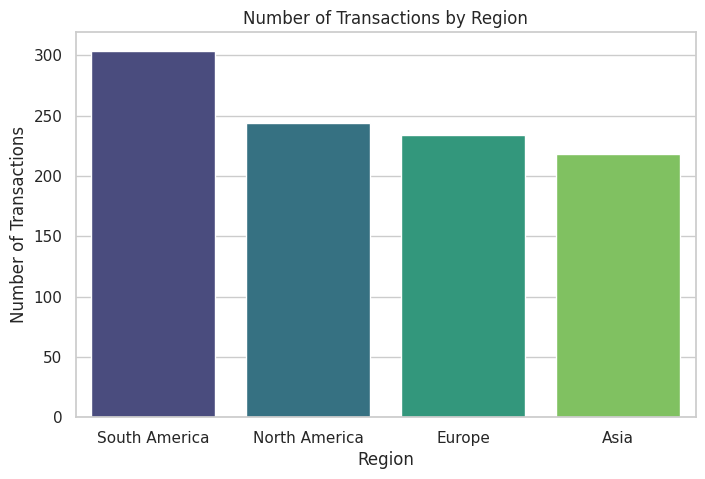

In [20]:
# 1. Distribution of transactions across regions
region_distribution = merged_data['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")
plt.title("Number of Transactions by Region")
plt.ylabel("Number of Transactions")
plt.xlabel("Region")
plt.show()

<ipython-input-22-9d43a9f6b5bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="crest")


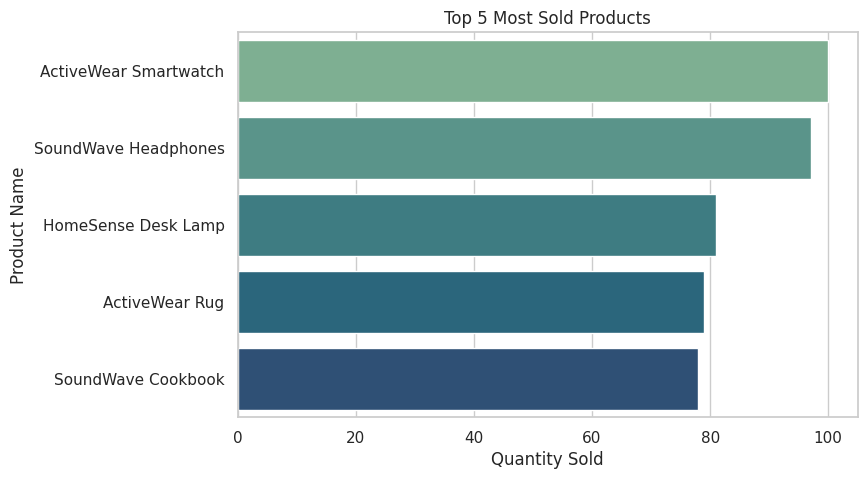

In [22]:
# 2. Top 5 most sold products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="crest")
plt.title("Top 5 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

<ipython-input-23-47180872eb5b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="mako")


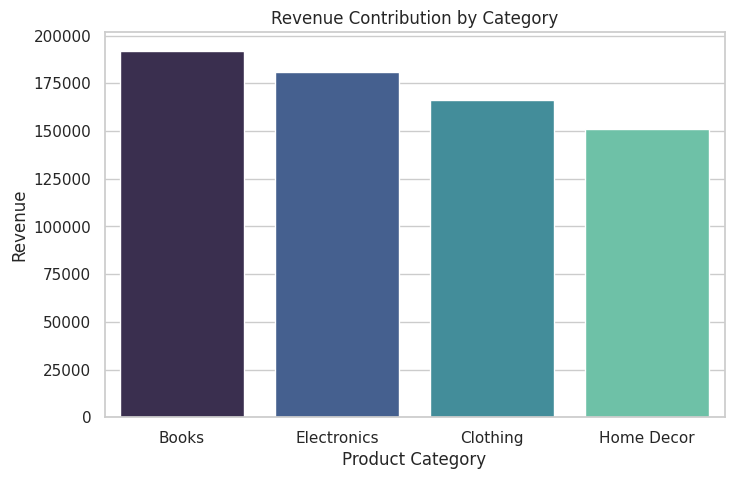

In [23]:
# 3. Revenue contribution by product category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="mako")
plt.title("Revenue Contribution by Category")
plt.ylabel("Revenue")
plt.xlabel("Product Category")
plt.show()

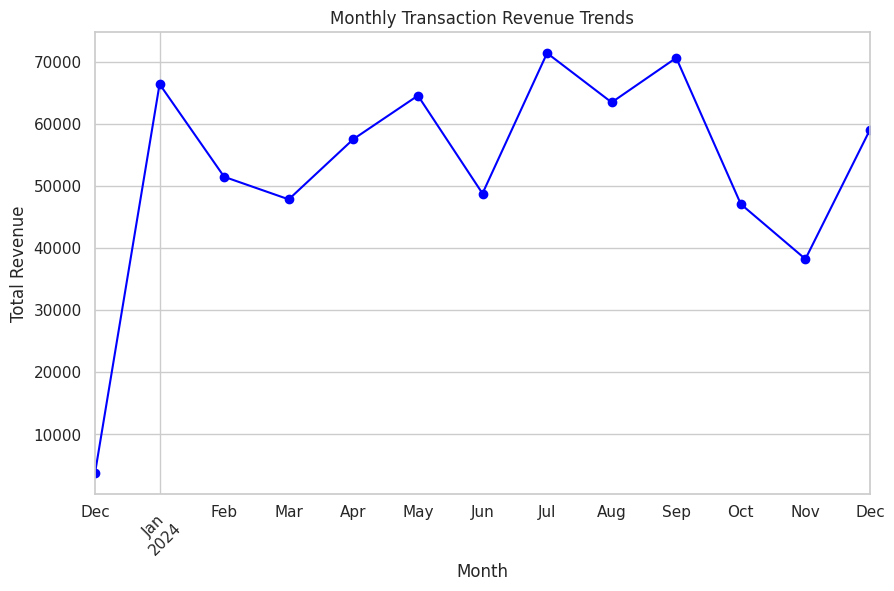

In [24]:
# 4. Transaction trends over time
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_trends = merged_data.groupby('TransactionMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Transaction Revenue Trends")
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-25-8ed5aad1d682>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction_by_region.index, y=avg_transaction_by_region.values, palette="coolwarm")


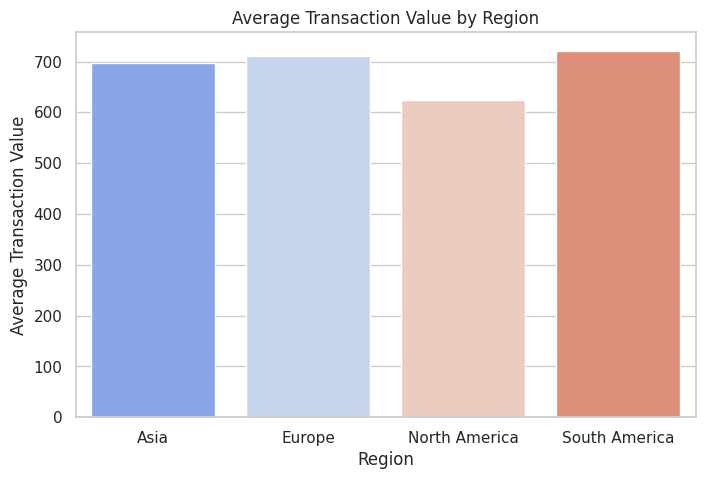

In [25]:
# 5. Average transaction value by region
avg_transaction_by_region = merged_data.groupby('Region')['TotalValue'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_transaction_by_region.index, y=avg_transaction_by_region.values, palette="coolwarm")
plt.title("Average Transaction Value by Region")
plt.ylabel("Average Transaction Value")
plt.xlabel("Region")
plt.show()